# Машинное обучение, ФКН ВШЭ

# Практическое задание 7. Бустинговое

## Общая информация

Дата выдачи: 13.12.2022

Мягкий дедлайн: 20.12.2022 23:59 MSK

Жёсткий дедлайн: 20.12.2022 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-07-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [43]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split

sns.set(style='darkgrid')
filterwarnings('ignore')

In [44]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустингового (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [99]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [16]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: user 1.65 s, sys: 38.4 ms, total: 1.69 s
Wall time: 1.76 s
Train ROC-AUC 0.9893
Valid ROC-AUC 0.9090
Test ROC-AUC 0.9113


Проверим рисуются ли графики

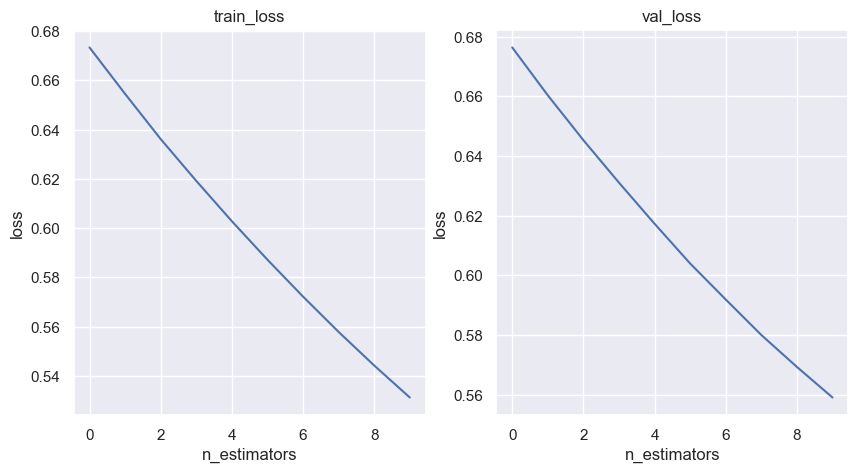

In [23]:
boosting = Boosting(plot=True)
boosting.fit(x_train, y_train, x_valid, y_valid)

## Задание 2. Обучение градиентного бустингового (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

In [24]:
from tqdm.notebook import tqdm

In [25]:
train_results = {}
test_results = {}

depths = range(1, 30, 2)

for depth in tqdm(depths):
    boosting = Boosting(base_model_params={'max_depth': depth})
    boosting.fit(x_train, y_train, x_valid, y_valid)
    train_results[depth] = boosting.score(x_train, y_train)
    test_results[depth] = boosting.score(x_test, y_test)

  0%|          | 0/15 [00:00<?, ?it/s]

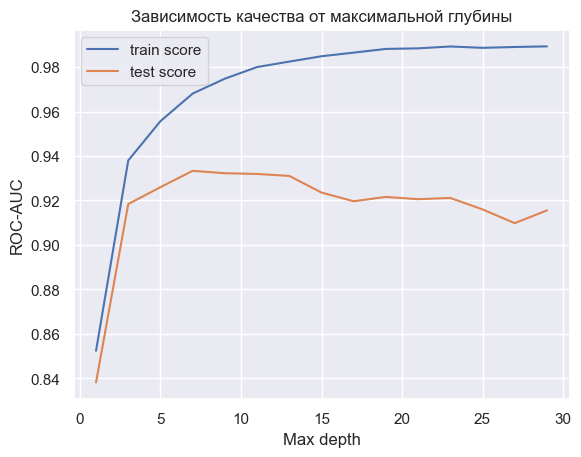

In [32]:
plt.title('Зависимость качества от максимальной глубины')
plt.xlabel('Max depth')
plt.ylabel('ROC-AUC')

plt.plot(depths, train_results.values())
plt.plot(depths, test_results.values())

plt.legend(['train score', 'test score'])
plt.show()

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

Лучшая модель - это модель с глубиной где-то 5-10. Как и говорит нам теория, лучше использовать неглубокие деревья, они не переобучаются и их правильная композиция даст низкое смещение.

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (3 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей. Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/).

In [46]:
# YOUR CODE:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.5/348.5 kB 2.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.2/210.2 kB 3.8 MB/s eta 0:00:006.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.1/147.1 kB 3.7 MB/s eta 0:00:000:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 kB 2.9 MB/s eta 0:00:00 MB/s eta 0:00:01
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11123 sha256=5ded05517e31fe20c7951d4f17b9eb0f0cd621380437549d2cf20713a7c949dd
  Stored in directory: /Users/kirillkorolev/Library/Caches/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip


In [47]:
import optuna

In [55]:
def objective(trial):
    tree_max_depth = trial.suggest_int('tree_max_depth', 1, 30, step=2)
    tree_min_samples_leaf = trial.suggest_int("tree_min_samples_leaf", 1, 20, log=True)
    tree_min_samples_split = trial.suggest_int("tree_min_samples_split", 2, 20, log=True)
    
    boosting_n_estimators = trial.suggest_int('boosting_n_estimators', 1, 100, step=10)
    boosting_lr = trial.suggest_float("boosting_lr", 1e-4, 1e-1, log=True)
    boosting_subsample = trial.suggest_float("boosting_subsample", 0.1, 1, step=0.1)
    boosting_early_stopping = trial.suggest_int("boosting_early_stopping", 10, 100, step=10)

    
    boosting = Boosting(base_model_params={
        'max_depth': tree_max_depth, 'min_samples_leaf': tree_min_samples_leaf, 'min_samples_split': tree_min_samples_split
    }, n_estimators=boosting_n_estimators, learning_rate=boosting_lr, subsample=boosting_subsample, early_stopping_rounds=boosting_early_stopping)
    
    boosting.fit(x_train, y_train, x_valid, y_valid)
    score = boosting.score(x_valid, y_valid)
    return score

In [56]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2022-12-20 21:11:02,978] A new study created in memory with name: no-name-e1a373d1-e36f-4f16-8cca-69b8938acbe5
[I 2022-12-20 21:11:04,904] Trial 0 finished with value: 0.9345156138128546 and parameters: {'tree_max_depth': 7, 'tree_min_samples_leaf': 3, 'tree_min_samples_split': 10, 'boosting_n_estimators': 31, 'boosting_lr': 0.00955714475865375, 'boosting_subsample': 0.1, 'boosting_early_stopping': 80}. Best is trial 0 with value: 0.9345156138128546.
[I 2022-12-20 21:11:06,067] Trial 1 finished with value: 0.9275601776134569 and parameters: {'tree_max_depth': 5, 'tree_min_samples_leaf': 16, 'tree_min_samples_split': 3, 'boosting_n_estimators': 21, 'boosting_lr': 0.0014327215797671775, 'boosting_subsample': 0.2, 'boosting_early_stopping': 90}. Best is trial 0 with value: 0.9345156138128546.
[I 2022-12-20 21:11:06,176] Trial 2 finished with value: 0.8952174791053557 and parameters: {'tree_max_depth': 9, 'tree_min_samples_leaf': 4, 'tree_min_samples_split': 2, 'boosting_n_estimators': 

[I 2022-12-20 21:14:41,512] Trial 23 finished with value: 0.9371580250520221 and parameters: {'tree_max_depth': 25, 'tree_min_samples_leaf': 5, 'tree_min_samples_split': 14, 'boosting_n_estimators': 91, 'boosting_lr': 0.022119199724554815, 'boosting_subsample': 0.7000000000000001, 'boosting_early_stopping': 40}. Best is trial 22 with value: 0.9404437782210399.
[I 2022-12-20 21:14:49,924] Trial 24 finished with value: 0.9386119299220246 and parameters: {'tree_max_depth': 13, 'tree_min_samples_leaf': 10, 'tree_min_samples_split': 9, 'boosting_n_estimators': 71, 'boosting_lr': 0.019383779874852996, 'boosting_subsample': 0.4, 'boosting_early_stopping': 40}. Best is trial 22 with value: 0.9404437782210399.
[I 2022-12-20 21:15:03,246] Trial 25 finished with value: 0.9392157613983668 and parameters: {'tree_max_depth': 13, 'tree_min_samples_leaf': 4, 'tree_min_samples_split': 11, 'boosting_n_estimators': 81, 'boosting_lr': 0.004255940347355324, 'boosting_subsample': 0.6, 'boosting_early_stoppi

[I 2022-12-20 21:18:43,704] Trial 46 finished with value: 0.9386801752508116 and parameters: {'tree_max_depth': 17, 'tree_min_samples_leaf': 4, 'tree_min_samples_split': 5, 'boosting_n_estimators': 91, 'boosting_lr': 0.007327101705807613, 'boosting_subsample': 0.30000000000000004, 'boosting_early_stopping': 40}. Best is trial 22 with value: 0.9404437782210399.
[I 2022-12-20 21:18:52,366] Trial 47 finished with value: 0.9403619636455937 and parameters: {'tree_max_depth': 13, 'tree_min_samples_leaf': 13, 'tree_min_samples_split': 8, 'boosting_n_estimators': 71, 'boosting_lr': 0.09331602264664497, 'boosting_subsample': 0.6, 'boosting_early_stopping': 30}. Best is trial 22 with value: 0.9404437782210399.
[I 2022-12-20 21:19:03,495] Trial 48 finished with value: 0.9396376053312773 and parameters: {'tree_max_depth': 13, 'tree_min_samples_leaf': 13, 'tree_min_samples_split': 8, 'boosting_n_estimators': 61, 'boosting_lr': 0.024168368772994213, 'boosting_subsample': 0.8, 'boosting_early_stoppin

[I 2022-12-20 21:22:47,184] Trial 69 finished with value: 0.9388146704309352 and parameters: {'tree_max_depth': 11, 'tree_min_samples_leaf': 12, 'tree_min_samples_split': 9, 'boosting_n_estimators': 81, 'boosting_lr': 0.017037881160285803, 'boosting_subsample': 0.8, 'boosting_early_stopping': 70}. Best is trial 22 with value: 0.9404437782210399.
[I 2022-12-20 21:23:01,445] Trial 70 finished with value: 0.9392017930562175 and parameters: {'tree_max_depth': 13, 'tree_min_samples_leaf': 17, 'tree_min_samples_split': 10, 'boosting_n_estimators': 71, 'boosting_lr': 0.039803127723349166, 'boosting_subsample': 0.9, 'boosting_early_stopping': 40}. Best is trial 22 with value: 0.9404437782210399.
[I 2022-12-20 21:23:07,960] Trial 71 finished with value: 0.9252565984452837 and parameters: {'tree_max_depth': 3, 'tree_min_samples_leaf': 12, 'tree_min_samples_split': 11, 'boosting_n_estimators': 91, 'boosting_lr': 0.06040955581144765, 'boosting_subsample': 0.7000000000000001, 'boosting_early_stoppi

[I 2022-12-20 21:26:48,868] Trial 92 finished with value: 0.938844203497194 and parameters: {'tree_max_depth': 9, 'tree_min_samples_leaf': 13, 'tree_min_samples_split': 10, 'boosting_n_estimators': 91, 'boosting_lr': 0.08160489480161716, 'boosting_subsample': 0.30000000000000004, 'boosting_early_stopping': 60}. Best is trial 83 with value: 0.9406904192338484.
[I 2022-12-20 21:26:56,599] Trial 93 finished with value: 0.9391115974754813 and parameters: {'tree_max_depth': 9, 'tree_min_samples_leaf': 10, 'tree_min_samples_split': 14, 'boosting_n_estimators': 91, 'boosting_lr': 0.06121441777966575, 'boosting_subsample': 0.2, 'boosting_early_stopping': 90}. Best is trial 83 with value: 0.9406904192338484.
[I 2022-12-20 21:27:02,737] Trial 94 finished with value: 0.9336272272521559 and parameters: {'tree_max_depth': 5, 'tree_min_samples_leaf': 14, 'tree_min_samples_split': 11, 'boosting_n_estimators': 81, 'boosting_lr': 0.046754400489435764, 'boosting_subsample': 0.4, 'boosting_early_stopping

In [57]:
study.best_params

{'tree_max_depth': 11,
 'tree_min_samples_leaf': 12,
 'tree_min_samples_split': 13,
 'boosting_n_estimators': 91,
 'boosting_lr': 0.06715588306975148,
 'boosting_subsample': 0.30000000000000004,
 'boosting_early_stopping': 60}

## Задание 4. Интерпретация бустингового (2 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

In [85]:
# YOUR CODE:
def plot_calibration_curve(y_test, preds, title):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 10
    y_test = 0.5 * y_test + 0.5
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2) 
        y_seg = y_test[(preds >= l) & (preds < r)]
        bin_real_ratios.append(y_seg.mean()) 
    
    plt.figure(figsize=(6,6))
    plt.plot([0, 1], [0, 1], '--')
    plt.plot(bin_middle_points, bin_real_ratios)
    plt.ylim([-0.05, 1.05])
    plt.grid()
    plt.title(title)

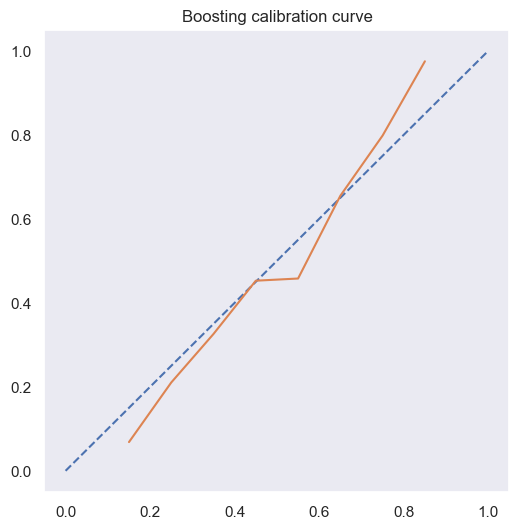

In [102]:
boosting = Boosting(base_model_params={
    'max_depth': study.best_params['tree_max_depth'], 'min_samples_leaf': study.best_params['tree_min_samples_leaf'], 'min_samples_split': study.best_params['tree_min_samples_split']
}, n_estimators=study.best_params['boosting_n_estimators'], learning_rate=study.best_params['boosting_lr'], subsample=study.best_params['boosting_subsample'], early_stopping_rounds=study.best_params['boosting_early_stopping'])

boosting.fit(x_train, y_train, x_valid, y_valid)
plot_calibration_curve(y_test, boosting.predict_proba(x_test)[:, 1], 'Boosting calibration curve')

In [103]:
from sklearn.linear_model import LogisticRegression

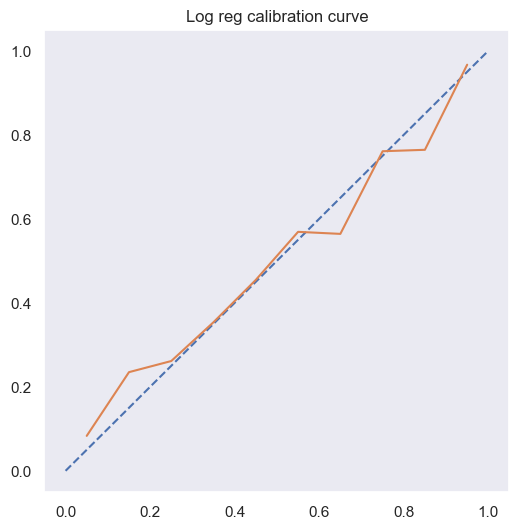

In [104]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
plot_calibration_curve(y_test, log_reg.predict_proba(x_test)[:, 1], 'Log reg calibration curve')

Вообще довольно хорошо, в сравнении с логрегом даже гладкая такая получилась, ну мы же сигмоиду используем, наверное, поэтому.

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

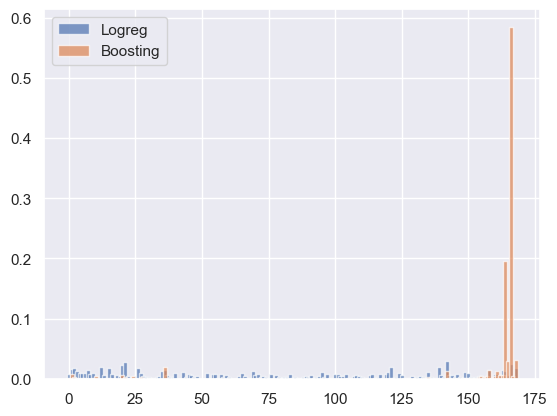

In [141]:
# YOUR CODE:
plt.bar(np.arange(len(log_reg.coef_[0])), np.abs(log_reg.coef_[0]) / np.abs(log_reg.coef_[0]).sum(), width=1.5, alpha=0.7)
plt.bar(np.arange(len(boosting.feature_importances_)), boosting.feature_importances_, width=1.5, alpha=0.7)
plt.legend(['Logreg', 'Boosting']);

В бустинге у нас деревья небольшой глубины, мы пытаемся найти такие признаки, которые бы очень хорошо разделяли наши данные. Поэтому очень часто будет фигурировать какое-то подмножество самых важных признаков. Дереву не выгодно размазывать важность по всем признакам, как логистической регрессии.

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

Качество до прунинга

In [142]:
boosting.score(x_test, y_test)

0.9368519955977032

In [145]:
features_start = 160

In [148]:
# YOUR CODE:
boosting_pruned = Boosting(base_model_params={
    'max_depth': study.best_params['tree_max_depth'], 'min_samples_leaf': study.best_params['tree_min_samples_leaf'], 'min_samples_split': study.best_params['tree_min_samples_split']
}, n_estimators=study.best_params['boosting_n_estimators'], learning_rate=study.best_params['boosting_lr'], subsample=study.best_params['boosting_subsample'], early_stopping_rounds=study.best_params['boosting_early_stopping'])

boosting_pruned.fit(x_train[:, features_start:], y_train, x_valid[:, features_start:], y_valid)
boosting_pruned.score(x_test[:, features_start:], y_test)

0.9303292433119255

Особо в качестве не просели, зато можно использовать намного меньше признаков!

## Задание 5 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [149]:
from sklearn.model_selection import KFold

In [181]:
# YOUR CODE:
def run_blender():
    n_splits = 5
    kf = KFold(n_splits=n_splits)
    test_size = list(kf.split(x_train))[0][1].shape[0]
    predictions = np.zeros((x_train.shape[0], 2))
    y_values = np.zeros(x_train.shape[0])
    
    for i, (train_index, test_index) in enumerate(kf.split(x_train)):

        boosting = Boosting(base_model_params={
            'max_depth': study.best_params['tree_max_depth'], 'min_samples_leaf': study.best_params['tree_min_samples_leaf'], 'min_samples_split': study.best_params['tree_min_samples_split']
        }, n_estimators=study.best_params['boosting_n_estimators'], learning_rate=study.best_params['boosting_lr'], subsample=study.best_params['boosting_subsample'], early_stopping_rounds=study.best_params['boosting_early_stopping'])

        logreg = LogisticRegression()
        
        boosting.fit(x_train[train_index], y_train[train_index], x_train[test_index], y_train[test_index])
        log_reg.fit(x_train[train_index], y_train[train_index])
        
        predictions[i*test_size:(i+1)*test_size, 0] = boosting.predict_proba(x_train[test_index])[:, 1]
        predictions[i*test_size:(i+1)*test_size, 1] = log_reg.predict_proba(x_train[test_index])[:, 1]
        
        y_values[i*test_size:(i+1)*test_size] = y_train[test_index]
    
    return predictions, y_values

blending_predictions, blending_gt = run_blender()

In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [189]:
scaler = StandardScaler()
lin_reg = LinearRegression()
lin_reg.fit(scaler.fit_transform(blending_predictions), blending_gt)
blending_coefs = lin_reg.coef_
blending_coefs

array([0.31740541, 0.4987067 ])

In [191]:
from sklearn.metrics import roc_auc_score

In [192]:
y_pred = blending_coefs[0] * boosting.predict_proba(x_test)[:, 1] + blending_coefs[1] * log_reg.predict_proba(x_test)[:, 1]
roc_auc_score(y_test == 1, y_pred)

0.9398844790694085

Стало лучше

## Задание 6 (бонус). Катбустовое (1 балл)

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [ ]:
# YOUR CODE:

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2023 года?

На хмуром...

Спасибо Никите Киселеву за счастливое детство!

![](new_year_cringe.jpg)